In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
from __future__ import print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAvgPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K

In [3]:
#---------------#
# Load the data #
#---------------#

In [72]:
import matplotlib.pyplot as plt

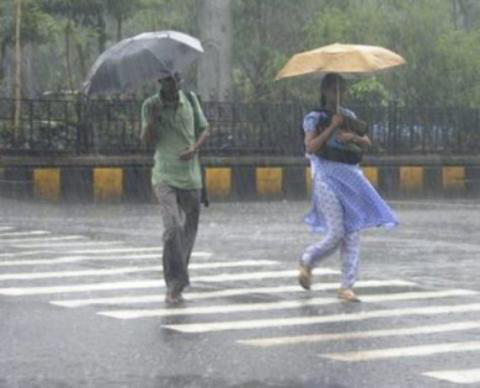

<Figure size 720x720 with 0 Axes>

In [76]:
plt.figure(figsize=(10, 10))
tf.keras.preprocessing.image.load_img('datasets/weather_images/train/rain/rain16.jpg')

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [5]:
# load and iterate training dataset
train_iter = datagen.flow_from_directory('datasets/weather_images/train', class_mode='categorical', batch_size=64)

# load and iterate validation dataset
validation_iter = datagen.flow_from_directory('datasets/weather_images/validation', class_mode='categorical', batch_size=64)

# load and iterate test dataset
test_iter = datagen.flow_from_directory('datasets/weather_images/test', class_mode='categorical', batch_size=64)


Found 871 images belonging to 4 classes.
Found 101 images belonging to 4 classes.
Found 153 images belonging to 4 classes.


In [6]:
train_iter

In [ ]:
#--------------#
# Design Model #
#--------------#

In [7]:
num_classes = 4
input_shape = [256, 256, 3]

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [12]:
model.fit_generator(train_iter, steps_per_epoch=16, validation_data=validation_iter, validation_steps=8)

16/16 [==============================] - 532s 33s/step - loss: 10.5813 - accuracy: 0.3413 - val_loss: 12.1201 - val_accuracy: 0.2475
